In [34]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df_sales = pd.read_csv("sales_sample.csv")
df_sales.head()

,気温,単価,雨,売上
0,5.8,200,○,401
1,5.7,180,○,345
2,10.3,180,○,480
3,14.5,200,NaN,590
4,21.1,220,NaN,928


In [36]:
df_sales["雨_ダミー"] = pd.get_dummies(df_sales["雨"], dtype=int)
df_sales.head()

,気温,単価,雨,売上,雨_ダミー
0,5.8,200,○,401,1
1,5.7,180,○,345,1
2,10.3,180,○,480,1
3,14.5,200,NaN,590,0
4,21.1,220,NaN,928,0


In [37]:
X = df_sales[["気温", "単価", "雨_ダミー"]]
y = df_sales["売上"]

model = sm.OLS(y, sm.add_constant(X))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     売上   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     55.83
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           8.19e-13
Time:                        12:38:44   Log-Likelihood:                -225.71
No. Observations:                  36   AIC:                             459.4
Df Residuals:                      32   BIC:                             465.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -340.9653    303.596     -1.123      0.270    -959.371     277.440
気温            48.2076      4.818     10.005      0.000      38.393      58.022
単価             1.1667      1.314      0.888      0.381      -1.511       3.844
雨_ダミー        193.0358     77.940      2.477      0.019      34.277     351.794
==============================================================================
Omnibus:                        1.521   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                1.072
Skew:                          -0.112   Prob(JB):                        0.585
Kurtosis:                       2.185   Cond. No.                     2.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
model = smf.ols(data=df_sales, #重回帰はsmf.ols
            formula = "売上 ~ 気温 + 雨_ダミー + 単価") #"売上 ~ 気温*単価*雨ダミー"    
result = model.fit()


result = model.fit_regularized(L1_wt=0, alpha=0.001)
result.params

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(result.predict(), df_sales["売上"]))

np.float64(127.91054278764399)

In [39]:
df_sales_pred = pd.read_csv("sales_sample_pred.csv")
df_sales_pred

,気温,単価,雨_ダミー
0,12.6,180,1
1,18.7,200,0
2,10.2,180,0
3,15.1,240,1
4,20.5,200,0


In [40]:
result.predict(df_sales_pred)

0    671.430498
1    797.032635
2    372.234393
3    847.666277
4    882.975509
dtype: float64

<Figure size 1500x500 with 0 Axes>

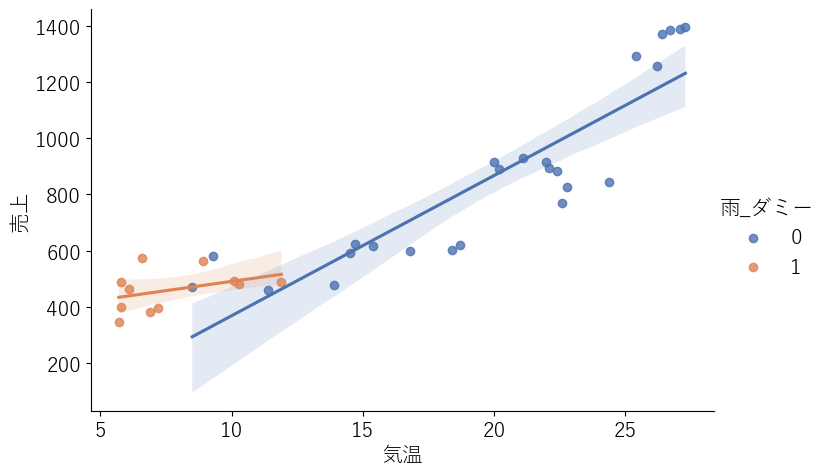

In [ ]:
plt.rcParams["font.family"] = "Yu Gothic"
plt.rcParams["font.size"] = 15
plt.figure(figsize=(15, 5))
df_sorted= df_sales.sort_values("気温")
df_sorted_0 = df_sorted[df_sorted["雨_ダミー"]==0]
df_sorted_1 = df_sorted[df_sorted["雨_ダミー"]==1]

sns.lmplot(data=df_sorted,
           aspect = 1.5,
           palette="deep",
           x="気温", y="売上",
           hue="雨_ダミー")

In [42]:
df_user = pd.read_csv("user_sample.csv")
df_user.head() #ダミー化済み

,性別,学生,滞在時間,登録
0,1,0,34,0
1,1,0,28,0
2,0,0,98,0
3,1,0,70,0
4,0,1,67,1


In [43]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.glm(data=df_user, #非直線回帰はsmf.glm
            formula = "登録 ~ 学生 + 滞在時間",
            family=sm.families.Binomial())    
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     登録   No. Observations:                   40
Model:                            GLM   Df Residuals:                       37
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19.813
Date:                Thu, 14 Nov 2024   Deviance:                       39.627
Time:                        12:38:44   Pearson chi2:                     35.0
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2828
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1094      1.507     -2.728      0.006      -7.062      -1.157
学生             1.8831      0.798      2.361      0.018       0.320       3.447
滞在時間           0.0403      0.018      2.188      0.029       0.004       0.076
==============================================================================
"""

In [ ]:
result.aic #精度確認ちいさいほうがいい

np.float64(45.626613463896824)

In [47]:
df_user_pred = pd.read_csv("user_sample_pred.csv")
df_user_pred

,性別,学生,滞在時間
0,0,1,67
1,0,0,80
2,1,0,19
3,0,1,92
4,1,1,56
5,0,0,42
6,0,0,98
7,1,1,78
8,1,0,90
9,0,1,66


In [48]:
result.predict(df_user_pred)

0    0.617041
1    0.292847
2    0.034132
3    0.815431
4    0.508296
5    0.082051
6    0.461241
7    0.715211
8    0.382695
9    0.607463
dtype: float64

In [50]:
df_contract = pd.read_csv("contract_sample.csv")
df_contract.head()

,氏名,訪問回数,メール送信,成約数
0,Aさん,32,0,0
1,Bさん,56,1,3
2,Cさん,42,1,1
3,Dさん,36,0,1
4,Eさん,60,0,0


In [54]:
model = smf.glm(data = df_contract,
                formula= "成約数 ~ 訪問回数+メール送信",
                family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    成約数   No. Observations:                   52
Model:                            GLM   Df Residuals:                       49
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62.097
Date:                Thu, 14 Nov 2024   Deviance:                       36.652
Time:                        12:49:00   Pearson chi2:                     31.0
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4327
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5568      0.581     -2.679      0.007      -2.696      -0.418
訪問回数           0.0256      0.012      2.067      0.039       0.001       0.050
メール送信          1.1671      0.276      4.228      0.000       0.626       1.708
==============================================================================
"""

In [55]:
result.aic

np.float64(130.1934628570886)

<Figure size 1500x500 with 0 Axes>

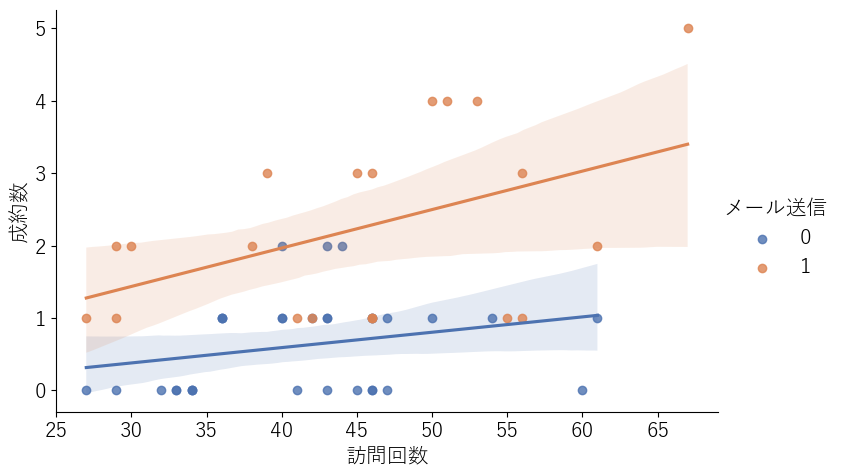

In [59]:
plt.rcParams["font.family"] = "Yu Gothic"
plt.rcParams["font.size"] = 15
plt.figure(figsize=(15, 5))
df_sorted_cont= df_contract.sort_values("訪問回数")
df_sorted_cont_mailed = df_sorted_cont[df_sorted_cont["メール送信"]==0]
df_sorted_cont_unmailed = df_sorted_cont[df_sorted_cont["メール送信"]==1]

sns.lmplot(data=df_sorted_cont,
           aspect = 1.5,
           palette="deep",
           x="訪問回数", y="成約数",
           hue="メール送信")